## MA-IRL 
- linear quadratic case
- synchronous update


_adopting a new data format_

In [1]:
using PyPlot
using JLD2, FileIO
using StatsBase, LinearAlgebra

#### normalized feature counts 
- decaying learning rate 
- number of demonstrations 3000, each iteration has 200 samples to increase randomness

In [23]:
@load "../data/2020-07-12T14:05:39.298.jld2"  data     # normalized feature

1-element Array{Symbol,1}:
 :data

In [24]:
data["feature_counts_proposed"]
data
size(data["theta_est"])[1]
size(data["feature_counts_proposed"] )
hcat(data["feature_counts_demonstration"]...)

1×8 Array{Float64,2}:
 5340.9  5263.78  870.009  869.239  5340.9  5263.78  870.009  869.239

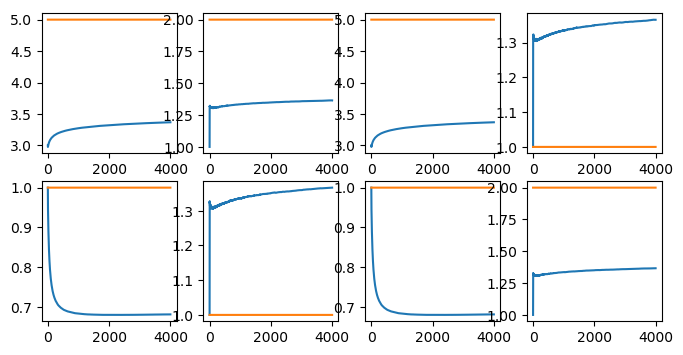

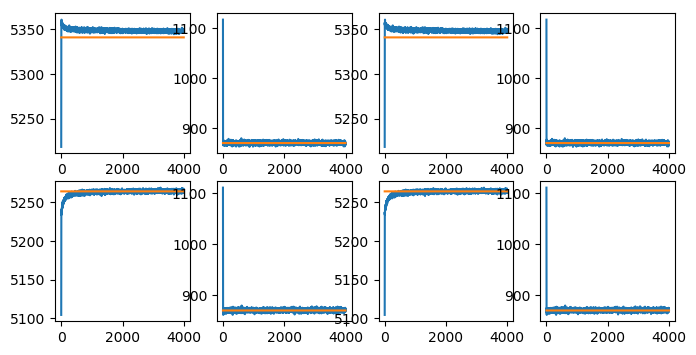

In [25]:
fc_difference = data["feature_counts_proposed"] .- hcat(data["feature_counts_demonstration"]...)


num = size(data["theta_est"])[1]

# plot the theta estimation 
rows = 2 
cols = 4 
figsize=(8,4)
fig_theta, axs_theta = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_theta) 
    ax.plot(data["theta_est"][:,idx])
    ax.plot(ones(num) * data["true theta"][idx])
end 


# plot the feature counts vs. feature counts from demonstration
rows = 2 
cols = 4 
figsize=(8,4)
fig_fc, axs_fc = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_fc) 
    ax.plot(data["feature_counts_proposed"][:,idx])
    ax.plot(ones(num-1) * data["feature_counts_demonstration"][idx])
#     ax.plot(fc_difference[idx])
#     ax.set_yscale("log")
end 

In [27]:
# demonstration
println(" ----- demonstration ---- ")
cost_dem_1 = data["feature_counts_demonstration"][1:4]' * data["true theta"][1:4]
cost_dem_2 = data["feature_counts_demonstration"][5:end]' * data["true theta"][5:end]
println(" demo feature counts ", data["feature_counts_demonstration"][1:4])
println(" true theta ", data["true theta"])
println(" this is demonstrated cost: player 1- ", cost_dem_1, " and player 2- ", cost_dem_2)


# estimation
println(" ----- estimation ---- ")
fc_avg = mean(data["feature_counts_proposed"][end-100:end,:], dims=1)
println(" est feature counts ", fc_avg[1:4])
theta_avg = mean(data["theta_est"][end-100:end,:], dims=1)
println(" estimated  theta ", theta_avg[1:4], theta_avg[5:end])
cost_est_1 = fc_avg[1:4]' * theta_avg[1:4]
cost_est_2 = fc_avg[5:end]' * theta_avg[5:end]
println(" this is estimated cost: player 1- ", cost_est_1, " and player 2- ", cost_est_2)

 ----- demonstration ---- 
 demo feature counts [5340.9, 5263.78, 870.009, 869.239]
 true theta [5.0, 1.0, 2.0, 1.0, 5.0, 1.0, 1.0, 2.0]
 this is demonstrated cost: player 1- 34577.54613384479 and player 2- 34576.77672986553
 ----- estimation ---- 
 est feature counts [5348.03, 5264.19, 870.197, 869.684]
 estimated  theta [3.36801, 0.681314, 1.36549, 1.36626][3.36801, 0.681314, 1.36549, 1.36626]
 this is estimated cost: player 1- 23975.23627823299 and player 2- 23975.23627823299


#### unnormalized feature counts
- decaying learning rate

In [28]:
@load "../data/2020-07-12T14:04:41.89.jld2"  data   # unnormalized feature


1-element Array{Symbol,1}:
 :data

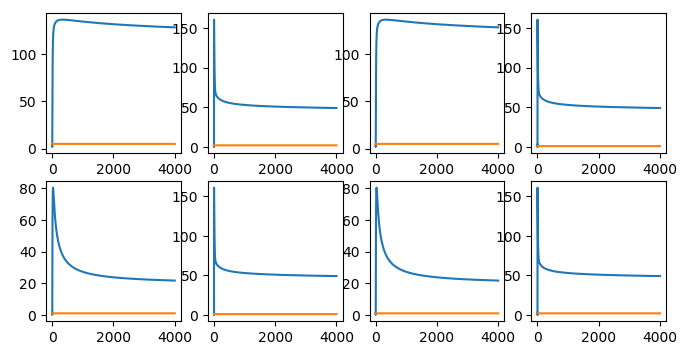

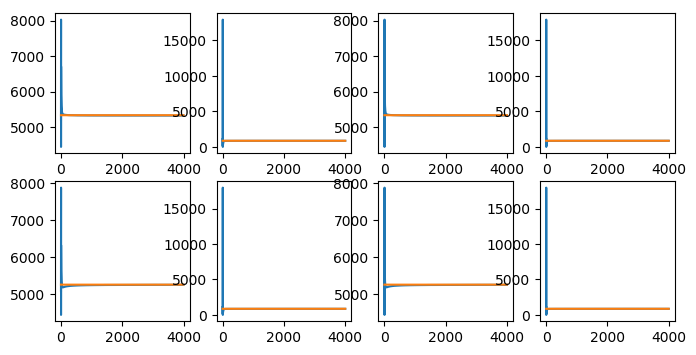

In [29]:
fc_difference = data["feature_counts_proposed"] .- hcat(data["feature_counts_demonstration"]...)


num = size(data["theta_est"])[1]

# plot the theta estimation 
rows = 2 
cols = 4 
figsize=(8,4)
fig_theta, axs_theta = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_theta) 
    ax.plot(data["theta_est"][:,idx])
    ax.plot(ones(num) * data["true theta"][idx])
end 


# plot the feature counts vs. feature counts from demonstration
rows = 2 
cols = 4 
figsize=(8,4)
fig_fc, axs_fc = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_fc) 
    ax.plot(data["feature_counts_proposed"][:,idx])
    ax.plot(ones(num-1) * data["feature_counts_demonstration"][idx])
#     ax.plot(fc_difference[idx])
#     ax.set_yscale("log")
end 

In [30]:
# demonstration
println(" ----- demonstration ---- ")
cost_dem_1 = data["feature_counts_demonstration"][1:4]' * data["true theta"][1:4]
cost_dem_2 = data["feature_counts_demonstration"][5:end]' * data["true theta"][5:end]
println(" demo feature counts ", data["feature_counts_demonstration"][1:4])
println(" true theta ", data["true theta"])
println(" this is demonstrated cost: player 1- ", cost_dem_1, " and player 2- ", cost_dem_2)


# estimation
println(" ----- estimation ---- ")
fc_avg = mean(data["feature_counts_proposed"][end-100:end,:], dims=1)
println(" est feature counts ", fc_avg[1:4])
theta_avg = mean(data["theta_est"][end-100:end,:], dims=1)
println(" estimated  theta ", theta_avg[1:4], theta_avg[5:end])
cost_est_1 = fc_avg[1:4]' * theta_avg[1:4]
cost_est_2 = fc_avg[5:end]' * theta_avg[5:end]
println(" this is estimated cost: player 1- ", cost_est_1, " and player 2- ", cost_est_2)

 ----- demonstration ---- 
 demo feature counts [5340.77, 5263.96, 870.243, 869.448]
 true theta [5.0, 1.0, 2.0, 1.0, 5.0, 1.0, 1.0, 2.0]
 this is demonstrated cost: player 1- 34577.7253210734 and player 2- 34576.93086950072
 ----- estimation ---- 
 est feature counts [5330.49, 5259.26, 865.244, 864.475]
 estimated  theta [128.125, 21.7025, 49.1424, 49.1943][128.125, 21.7025, 49.1424, 49.1943]
 this is estimated cost: player 1- 882153.782624763 and player 2- 882153.782624763
